<center>
    <h1>Fruit Inspection</h1>
    <h2>Image Processing and Computer Vision</h2>
    <h3>Riccardo Spolaor</h3>
    <h4>riccardo.spolaor@studio.unibo.it</h4>
</center>

# Fruit Inspection

In [1]:
%matplotlib inline

import cv2
import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
print(f'Using OpenCV version: {cv2.__version__}')

Using OpenCV version: 4.6.0


In [3]:
SEED = 42

cv2.setRNGSeed(SEED)
np.random.seed(SEED)

# First task: Fruit Segmentation and Defect Detection

In [4]:
dir_1 = 'images/first task/'
grayscale_names_1, color_names_1 = [[f'{dir_1}C{j}_00000{i}.png' for i in range(1,4)] for j in [0,1]]

In [5]:
print(grayscale_names_1)
print(color_names_1)

['images/first task/C0_000001.png', 'images/first task/C0_000002.png', 'images/first task/C0_000003.png']
['images/first task/C1_000001.png', 'images/first task/C1_000002.png', 'images/first task/C1_000003.png']


In [6]:
grayscale_imgs_1 = [cv2.imread(i, cv2.IMREAD_GRAYSCALE) for i in grayscale_names_1]
color_imgs_1 = [cv2.imread(i) for i in color_names_1]

In [7]:
def plot_image_grid(images, title, show_axis=True):
    fig = plt.figure(figsize=(15,10))
    fig.suptitle(title, fontsize=20)
    for idx, img in enumerate(images):
        plt.subplot(1, len(images), idx+1)
        plt.axis('on' if show_axis else 'off')
        if len(img.shape) == 3:
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        else:
            plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.tight_layout()
    plt.show()

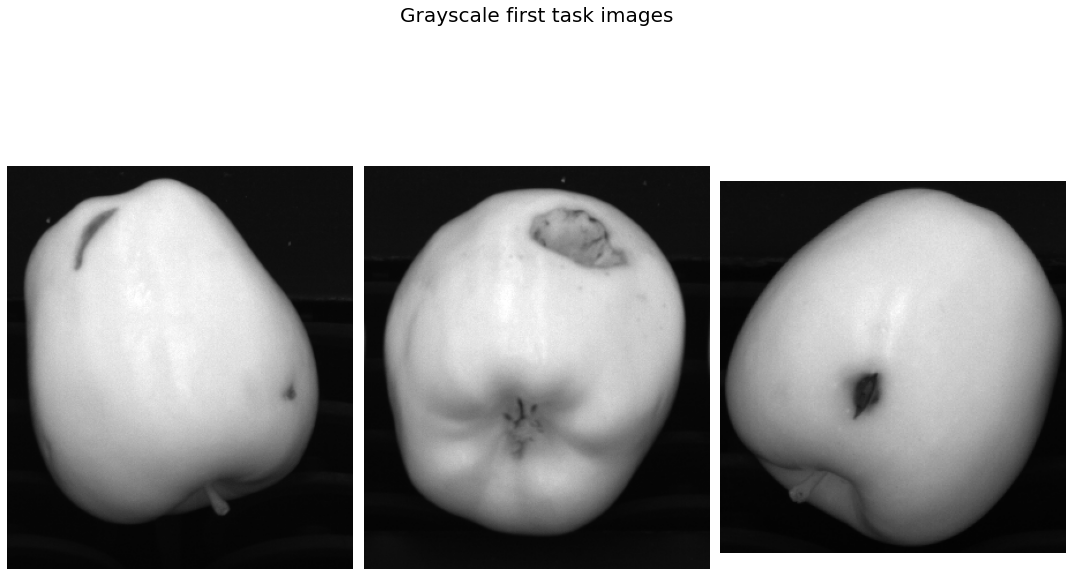

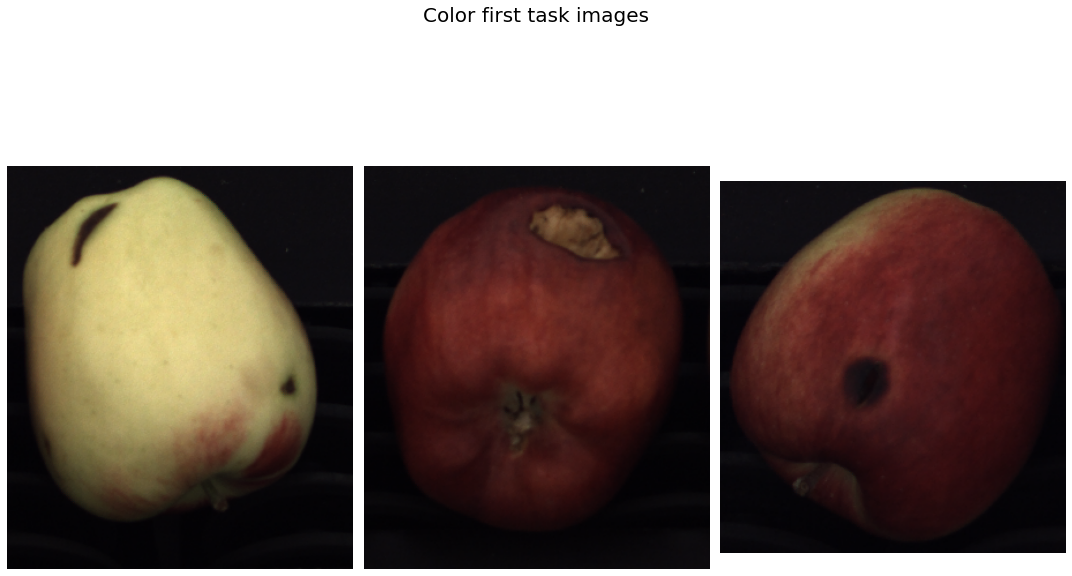

In [8]:
plot_image_grid(grayscale_imgs_1, 'Grayscale first task images', show_axis=False)
plot_image_grid(color_imgs_1, 'Color first task images', show_axis=False)

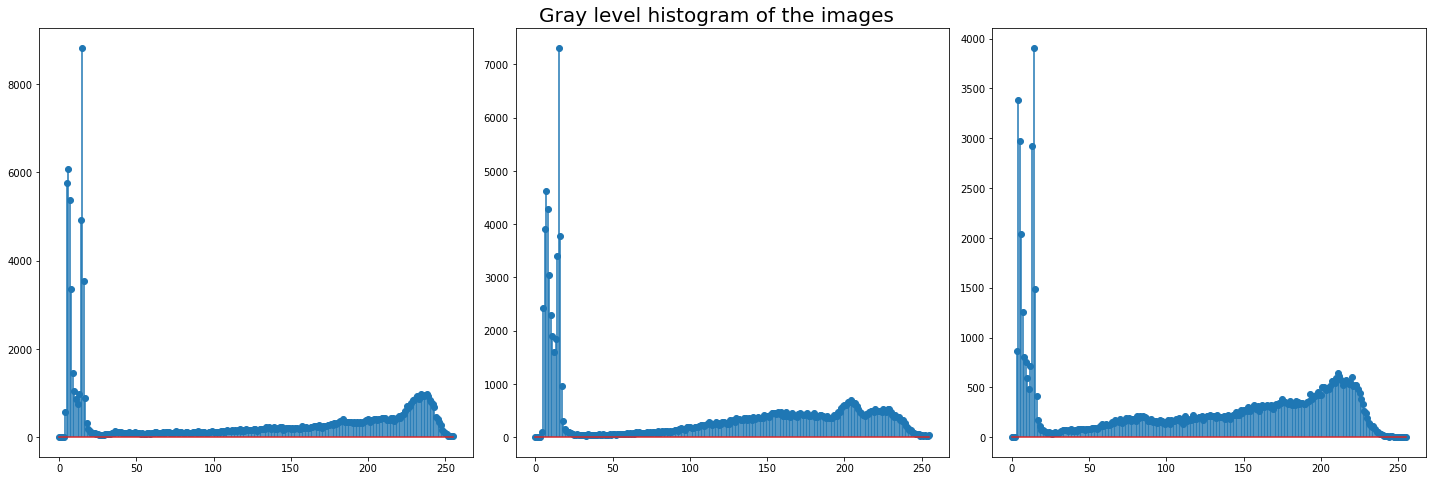

In [9]:
fig = plt.figure(figsize=(20,13))
fig.suptitle('Gray level histogram of the images', fontsize=20)
for idx, img in enumerate(grayscale_imgs_1):
    plt.subplot(2, 3, idx+1)
    hist, _ = np.histogram(img.flatten(), 256, [0,256])
    plt.stem(hist, use_line_collection=True)
plt.tight_layout()
plt.show()

## Outline the fruit by generating a binary mask

In order to solve the binarization task binary segmentation has to be applied. A threshold has to be found. 3 methods:

- Binarization by intensity thresholding
- Otsu's Algorithm
- Adaptive Thresholding

In [74]:
img = grayscale_imgs_1[0]
img_clr = color_imgs_1[0]

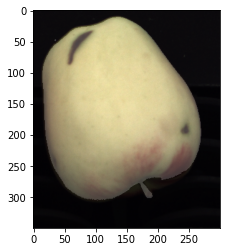

The obtained threshold with Intensity binarization is 54.0


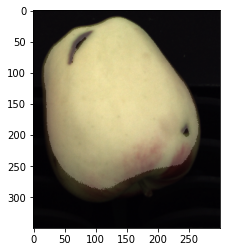

The obtained threshold with Otsu's Algorithm is 109.0


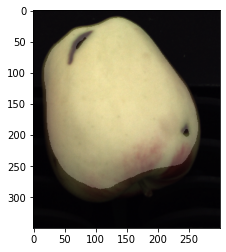

The obtained threshold with Otsu's Algorithm + Gaussian Smoothing is 110.0


In [76]:
# this is just for visualization.
# By looking at the greyscale histogram it is evident that the image is not inherently binary 
# and a clear threshold dividing background and foreground + imperfercions can't be found manually.
ret, threshold = cv2.threshold(img,100,255,cv2.THRESH_BINARY)
plt.imshow(cv2.cvtColor(img_clr, cv2.COLOR_BGR2RGB))
plt.imshow(threshold, cmap='gray', vmin=0, vmax=255, alpha=0.2)
plt.show()

print(f'The obtained threshold with Intensity binarization is {ret}')

ret,threshold = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(cv2.cvtColor(img_clr, cv2.COLOR_BGR2RGB))
plt.imshow(threshold, cmap='gray', vmin=0, vmax=255, alpha=0.2)
plt.show()

print(f'The obtained threshold with Otsu\'s Algorithm is {ret}')

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret,threshold = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(cv2.cvtColor(img_clr, cv2.COLOR_BGR2RGB))
plt.imshow(threshold, cmap='gray', vmin=0, vmax=255, alpha=0.2)
plt.show()

print(f'The obtained threshold with Otsu\'s Algorithm + Gaussian Smoothing is {ret}')

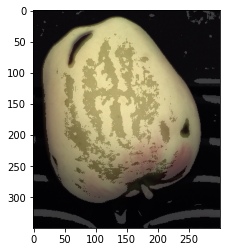

In [73]:
img_blur = cv2.medianBlur(img,5)
threshold = cv2.adaptiveThreshold(img_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 51, 0)

plt.imshow(cv2.cvtColor(img_clr, cv2.COLOR_BGR2RGB))
plt.imshow(threshold, cmap='gray', vmin=0, vmax=255, alpha=0.2)
plt.show()